In [1]:
import h5py
import librosa
import numpy as np

file = h5py.File('dataset.h5', 'r')
#label_dict = {"['n']": 0, "['c']": 1, "['h']": 2, "['s']": 3,
 #             "['a']": 4, "['f']": 5, "['d']": 6, "['su']": 7}

labels = file['label'][:36406].squeeze()
print('done!')
relevant_indexes =  np.where((labels != 6) & (labels != 7))

print('done!')
y = file['label'][relevant_indexes]
print('done!')
X = file['mfcc'][relevant_indexes]
print('done!')

X.shape, y.shape

done!
done!
done!
done!


((28388, 12, 42), (28388, 1))

In [ ]:
# extract delta and double delta features using librosa
for i in range(X.shape[0]):
    X_delta = librosa.feature.delta(X[i])
    X_delta2 = librosa.feature.delta(X[i], order=2)
    # np.vstack all the X, X_delta and X_delta2 
    X_deltas = np.vstack([X, X_delta, X_delta2])
    X_deltas.shape

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=32)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19019, 12, 42), (9369, 12, 42), (19019, 1), (9369, 1))

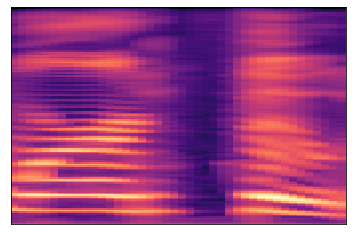

array([[-21.60799 , -20.1454  , -19.92197 , ..., -18.386524, -19.197872,
        -20.600376],
       [-21.385508, -21.43161 , -22.03455 , ..., -21.67913 , -21.99818 ,
        -23.29573 ],
       [-19.734455, -19.57219 , -19.978783, ..., -20.062634, -19.429605,
        -19.857994],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)

In [5]:
import librosa.display
import matplotlib.pyplot as plt
librosa.display.specshow(X_train[1])
plt.show()
X_train[0]

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D, Reshape
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import adam_v2
import keras

# import rms prop from keras


es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
opt = adam_v2.Adam(learning_rate=0.0001)
# model.compile(loss='categorical_crossentropy', optimizer=opt)

feature_shape = X_train[0].shape
print(feature_shape)
model = Sequential()
model.add(Reshape(target_shape=(
    feature_shape[0], feature_shape[1], 1), input_shape=(feature_shape[0], feature_shape[1])))
    
model.add(Conv2D(16, (3, 3), activation='relu', strides=(2, 1), padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(2, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(2, 1), padding='same'))
# model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu',
          strides=(1, 1), padding='same'))
model.add(MaxPooling2D((2, 1)))
model.add(Dropout(0.2))
model.add(Flatten())
# model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt, metrics=['accuracy'])


(12, 42)
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_15 (Reshape)        (None, 128, 42, 1)        0         
                                                                 
 conv2d_59 (Conv2D)          (None, 64, 42, 16)        160       
                                                                 
 dropout_22 (Dropout)        (None, 64, 42, 16)        0         
                                                                 
 conv2d_60 (Conv2D)          (None, 32, 42, 32)        4640      
                                                                 
 conv2d_61 (Conv2D)          (None, 16, 42, 64)        18496     
                                                                 
 conv2d_62 (Conv2D)          (None, 16, 42, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 42, 

In [38]:
cnnhistory=model.fit(X_train, y_train, batch_size=512, epochs=200,validation_data=(X_test, y_test), callbacks=[es], verbose=1)


Epoch 1/200
38/38 [==============================] - 7s 182ms/step - loss: 1.9538 - accuracy: 0.2094 - val_loss: 1.6467 - val_accuracy: 0.2695
Epoch 2/200
38/38 [==============================] - 7s 177ms/step - loss: 1.6400 - accuracy: 0.2492 - val_loss: 1.6193 - val_accuracy: 0.2213
Epoch 3/200
38/38 [==============================] - 7s 177ms/step - loss: 1.5756 - accuracy: 0.3086 - val_loss: 1.6069 - val_accuracy: 0.2452
Epoch 4/200
38/38 [==============================] - 7s 176ms/step - loss: 1.5093 - accuracy: 0.3560 - val_loss: 1.5635 - val_accuracy: 0.3299
Epoch 5/200
38/38 [==============================] - 7s 176ms/step - loss: 1.4202 - accuracy: 0.4193 - val_loss: 1.4341 - val_accuracy: 0.4210
Epoch 6/200
38/38 [==============================] - 7s 178ms/step - loss: 1.3666 - accuracy: 0.4394 - val_loss: 1.4402 - val_accuracy: 0.4238
Epoch 7/200
38/38 [==============================] - 7s 179ms/step - loss: 1.3198 - accuracy: 0.4590 - val_loss: 1.4325 - val_accuracy: 0.4449

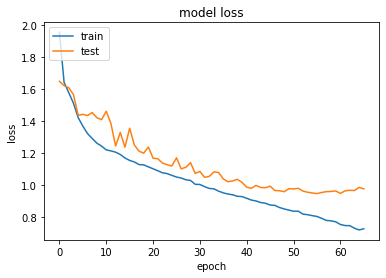

In [39]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

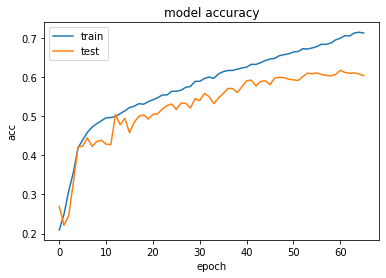

In [40]:
plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
cnnhistory.model.save('cnn_60.h5')